In [21]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.shape

(5572, 5)

In [22]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [23]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')>

In [24]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [25]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3532,ham,"Sorry, I'll call later",NaN,NaN,NaN
481,ham,"Yo carlos, a few friends are already asking me...",NaN,NaN,NaN
2303,ham,Should I tell my friend not to come round til ...,NaN,NaN,NaN
2044,ham,I can send you a pic if you like :),NaN,NaN,NaN
2537,ham,That's y we haf to combine n c how lor...,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [27]:
##Check for missing values
df.isnull().any(axis = 1)

0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Length: 5572, dtype: bool

In [28]:
##Check in total how many missing values are there
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##Data analysis using pandas
1. data cleaning
2. EDA
3. Text preprocessing
4. Trin test split
5. Build your model
6. Evaluate your model
7. Improvement
8. Deploy

###1. Data cleaning

In [29]:
##Remove the last three commands
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.shape

(5572, 2)

In [30]:
df.sample(3)

,v1,v2
4807,ham,What's up my own oga. Left my phone at home an...
161,ham,New car and house for my parents.:)i have only...
4885,ham,Or just do that 6times


In [31]:
##Rename the columns v1 -> target and v2 -> text
df.rename(columns = {'v1':'target'}, inplace = True)
df.rename(columns = {'v2':'text'}, inplace = True)
df.sample(3)

,target,text
5032,ham,* Was really good to see you the other day dud...
165,ham,I place all ur points on e cultures module alr...
1037,ham,"naughty little thought: 'its better to flirt, ..."


In [32]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
##Find out number of charecters for each message in text column
df['char_no'] = df['text'].apply(len)
df.head()

,target,text,char_no
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
##Find out the number of words for each charecter in text column
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sankarshan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df['words_no'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,char_no,words_no
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
##Find out the number of sentences for each character in text column


<Axes: xlabel='char_no', ylabel='Count'>

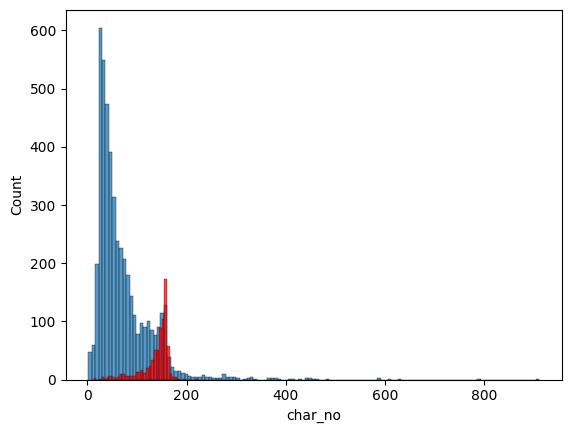

In [38]:
##Plot a pychart for ham and spam distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df[df['target'] == 0]['char_no'])
sns.histplot(df[df['target'] == 1]['char_no'], color = 'red')

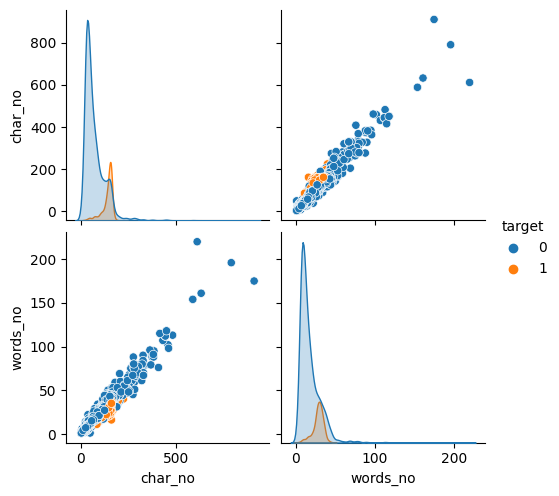

In [39]:
#pairplot
sns.pairplot(df, hue='target')

In [40]:
df.corr()

/tmp/ipykernel_4155/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,char_no,words_no
target,1.000000,0.387285,0.263221
char_no,0.387285,1.000000,0.966310
words_no,0.263221,0.966310,1.000000


/tmp/ipykernel_4155/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

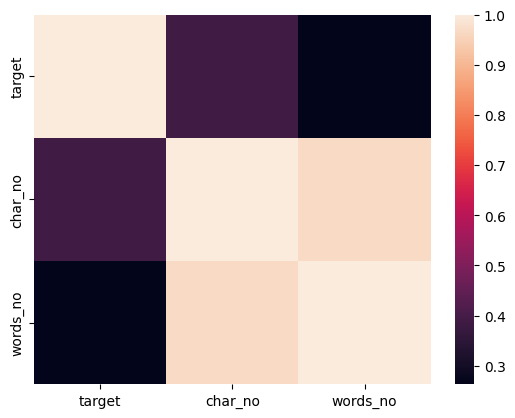

In [41]:
sns.heatmap(df.corr())

##Text Preprocessing
a. Lower the msg
b. Break the list of words
c. removal of stopwords
d. removal od punctuations symbol and special charecters
e. stemming or lematization

In [43]:
from nltk.corpus import stopwords


In [46]:
##Create a user defined function that converts the message into lowercase
def twist(txt):
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    y = []
    for i in txt:
        if i.isalnum():
            y.append()
    
    txt = y[:]
    y.clear
    for i in txt:
        if i not in stopwords.words('english'):
            y.append()
    
    txt = y[:]
    return txt
twist("Welas aaASISD *^&nda&&bBKda")

SyntaxError: invalid syntax (3799661135.py, line 10)